## Predict the Market - Fluid AI Test

In [1]:
import pandas as pd
import numpy as np

In [30]:
df_tr=pd.read_csv("train_data_nasdac.csv")
df_tr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
1,2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2,2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
3,2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
4,2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000
...,...,...,...,...,...,...,...
1254,2020-12-24,12791.540039,12833.549805,12767.639648,12804.730469,12804.730469,3305950000
1255,2020-12-28,12914.639648,12930.889648,12827.450195,12899.419922,12899.419922,5076340000
1256,2020-12-29,12965.389648,12973.330078,12821.959961,12850.219727,12850.219727,4680780000
1257,2020-12-30,12906.509766,12924.929688,12857.759766,12870.000000,12870.000000,5292210000


In [31]:
df_ts=pd.read_csv("test_data_nasdac.csv")
df_ts

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,15732.500000,15832.799805,15644.089844,15832.799805,15832.799805,4412130000
1,2022-01-04,15852.139648,15852.139648,15512.410156,15622.719727,15622.719727,5109270000
2,2022-01-05,15547.160156,15586.299805,15095.179688,15100.169922,15100.169922,5011990000
3,2022-01-06,15024.150391,15198.450195,14914.870117,15080.860352,15080.860352,4774740000
4,2022-01-07,15095.719727,15171.019531,14877.629883,14935.900391,14935.900391,4229270000
5,2022-01-10,14751.780273,14953.849609,14530.230469,14942.830078,14942.830078,5303230000
6,2022-01-11,14919.259766,15158.709961,14837.629883,15153.450195,15153.450195,4378660000
7,2022-01-12,15263.099609,15319.030273,15117.290039,15188.389648,15188.389648,4321180000
8,2022-01-13,15245.040039,15259.709961,14782.240234,14806.809570,14806.809570,4283070000
9,2022-01-14,14708.019531,14897.679688,14689.429688,14893.750000,14893.750000,4345780000


In [32]:
#Print the shape of Dataframe  and Check for Null Values\n",
print("Dataframe Shape: ", df_tr.shape)
print("Null Value Present: ", df_tr.isnull().values.any())

Dataframe Shape:  (1259, 7)
Null Value Present:  False


The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

<AxesSubplot:>

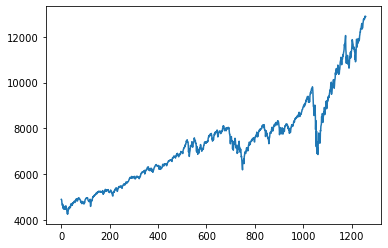

In [33]:
#Plot the True Adj Close Value\n",
df_tr["Adj Close"].plot()

Setting the Target Variable and Selecting the Features
The output column is then assigned to the target variable in the following step. It is the adjusted relative value of the Microsoft Stock in this situation. Furthermore, we pick the features that serve as the independent variable to the target variable (dependent variable). We choose four characteristics to account for training purposes:
Open,
High,
Low,
Volume

In [34]:
#Set Target Variable
output_var = pd.DataFrame(df_tr["Adj Close"])
#Selecting the Features",
features = ["Open", "High", "Low", "Volume"]

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_tr[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_tr.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.077612,0.070261,0.073684,0.274258
1,0.079920,0.072984,0.076663,0.235679
2,0.068021,0.065992,0.068794,0.267657
3,0.059176,0.057004,0.055320,0.318554
4,0.057532,0.051768,0.049502,0.283581


In [37]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [39]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [40]:
#pip install keras

In [41]:
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import adam_v2
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [42]:
#pip install pydot

In [43]:
#pip install graphviz

In [44]:
#pip install pydotplus

In [73]:
#Building the LSTM Model
ls = Sequential()
ls.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
ls.add(Dense(1))
ls.compile(loss="mean_squared_error", optimizer="adam")
plot_model(ls, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [74]:
X_train

array([[[0.07761204, 0.07026059, 0.07368411, 0.27425829]],

       [[0.07992036, 0.07298407, 0.07666287, 0.23567939]],

       [[0.06802084, 0.06599223, 0.06879396, 0.26765703]],

       ...,

       [[0.7181904 , 0.71881578, 0.7182528 , 0.55472679]],

       [[0.72110582, 0.74775316, 0.72598061, 0.54678142]],

       [[0.75676094, 0.75421966, 0.74476182, 0.68429564]]])

In [75]:
y_train

array([ 4903.089844,  4891.430176,  4835.759766, ..., 10503.19043 ,
       10767.089844, 10680.360352])

In [76]:
ls.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
#Model Training
history=ls.fit(X_train, y_train, epochs=500, batch_size=8, verbose=1, shuffle=False)

Epoch 1/500
144/144 [==============================] - 2s 2ms/step - loss: 50209692.0000
Epoch 2/500
144/144 [==============================] - 0s 2ms/step - loss: 50170524.0000
Epoch 3/500
144/144 [==============================] - 0s 2ms/step - loss: 50076240.0000
Epoch 4/500
144/144 [==============================] - 0s 2ms/step - loss: 49911132.0000
Epoch 5/500
144/144 [==============================] - 0s 2ms/step - loss: 49679724.0000
Epoch 6/500
144/144 [==============================] - 0s 2ms/step - loss: 49392148.0000
Epoch 7/500
144/144 [==============================] - 0s 2ms/step - loss: 49057384.0000
Epoch 8/500
144/144 [==============================] - 0s 2ms/step - loss: 48681948.0000
Epoch 9/500
144/144 [==============================] - 0s 2ms/step - loss: 48270420.0000
Epoch 10/500
144/144 [==============================] - 0s 2ms/step - loss: 47826176.0000
Epoch 11/500
144/144 [==============================] - 0s 2ms/step - loss: 47351852.0000
Epoch 12/500
144/14

In [78]:
#LSTM Prediction
y_pred= ls.predict(X_test)
print(y_pred.shape)
print(y_pred)


(114, 1)
[[10693.163 ]
 [10654.036 ]
 [10348.49  ]
 [10487.674 ]
 [10474.724 ]
 [10509.002 ]
 [10512.718 ]
 [10720.654 ]
 [10875.579 ]
 [10883.337 ]
 [10967.368 ]
 [11013.968 ]
 [11040.785 ]
 [10958.8545]
 [10913.7   ]
 [10889.625 ]
 [10979.703 ]
 [10957.027 ]
 [11003.244 ]
 [11065.151 ]
 [11122.015 ]
 [11146.526 ]
 [11235.773 ]
 [11351.956 ]
 [11303.009 ]
 [11463.764 ]
 [11558.231 ]
 [11528.22  ]
 [11652.317 ]
 [11749.82  ]
 [11910.18  ]
 [11686.341 ]
 [11254.474 ]
 [10927.339 ]
 [11016.075 ]
 [11089.835 ]
 [10870.207 ]
 [10990.247 ]
 [11139.353 ]
 [11110.944 ]
 [10815.265 ]
 [11017.084 ]
 [10626.929 ]
 [10803.232 ]
 [10836.6455]
 [10632.596 ]
 [10725.149 ]
 [11011.546 ]
 [11025.406 ]
 [11150.119 ]
 [11257.003 ]
 [11068.248 ]
 [11154.023 ]
 [11277.136 ]
 [11259.404 ]
 [11336.292 ]
 [11420.078 ]
 [11725.655 ]
 [11787.053 ]
 [11725.054 ]
 [11502.11  ]
 [11606.76  ]
 [11547.266 ]
 [11448.581 ]
 [11440.286 ]
 [11381.24  ]
 [11378.862 ]
 [11282.874 ]
 [11284.559 ]
 [11123.466 ]
 [11027.47 

In [79]:
print(y_test.shape)
print(y_test)

(114,)
[10706.129883 10461.419922 10363.179688 10536.269531 10402.089844
 10542.94043  10587.80957  10745.269531 10902.799805 10941.169922
 10998.400391 11108.070313 11010.980469 10968.360352 10782.820313
 11012.240234 11042.5      11019.299805 11129.730469 11210.839844
 11146.459961 11264.950195 11311.799805 11379.719727 11466.469727
 11665.05957  11625.339844 11695.629883 11775.459961 11939.669922
 12056.44043  11458.099609 11313.129883 10847.69043  11141.55957
 10919.589844 10853.549805 11056.650391 11190.320313 11050.469727
 10910.280273 10793.280273 10778.799805 10963.639648 10632.990234
 10672.269531 10913.55957  11117.530273 11085.25     11167.509766
 11326.509766 11075.019531 11332.490234 11154.599609 11364.599609
 11420.980469 11579.94043  11876.259766 11863.900391 11768.730469
 11713.870117 11671.55957  11478.879883 11516.490234 11484.69043
 11506.009766 11548.280273 11358.94043  11431.349609 11004.870117
 11185.589844 10911.589844 10957.610352 11160.570313 11590.780273
 1189

In [80]:
rmse=np.sqrt(np.mean(((y_pred- y_test)**2)))
print(rmse)

941.3875021073974


In [81]:
y_pred = y_pred.reshape(y_pred.shape[0])
y_pred.shape

(114,)

In [82]:
df_com=pd.DataFrame({"original":y_test,"predicted":y_pred}, index= range(len(y_test)))
df_com

,original,predicted
0,10706.129883,10693.163086
1,10461.419922,10654.036133
2,10363.179688,10348.490234
3,10536.269531,10487.673828
4,10402.089844,10474.723633
...,...,...
109,12804.730469,12617.525391
110,12899.419922,12874.491211
111,12850.219727,12863.655273
112,12870.000000,12900.743164


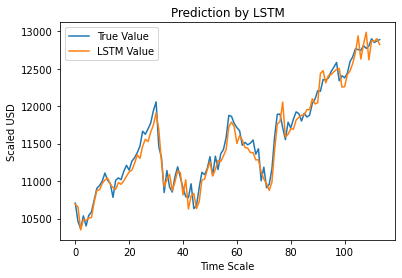

In [83]:
import matplotlib.pyplot as plt
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()
